Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 947 kB 29.2 MB/s            
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Su

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

## AutoGluon Classifier

In [5]:
# Load in the wine dataset
wine = datasets.load_wine()

In [6]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Include the target as well
df['target'] = wine.target
df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0,1
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0,1
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0,1
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630.0,2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0


In [17]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [21]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label='target').fit(
  train_data=df_train
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211115_221000/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20211115_221000/"
AutoGluon Version:  0.3.1
Train Data Rows:    142
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [2, 1, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2540.78 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtype

In [22]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost   1.000000       0.001120  0.489252                0.001120           0.489252            1       True          8
1   WeightedEnsemble_L2   1.000000       0.001488  0.718700                0.000368           0.229448            2       True         14
2            LightGBMXT   1.000000       0.003340  0.358966                0.003340           0.358966            1       True          4
3       NeuralNetFastAI   1.000000       0.016215  2.115085                0.016215           2.115085            1       True          3
4      RandomForestEntr   1.000000       0.102261  0.617753                0.102261           0.617753            1       True          7
5      RandomForestGini   1.000000       0.102311  0.619245                0.102311           0.619245        

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetMXNet': 'TabularNeuralNetModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.7586206896551724,
  'KNeighborsDist': 0.7241379310344828,
  'NeuralNetFastAI': 1.0,
  'LightGBMXT': 1.0,
  'LightGBM': 0.9655172413793104,
  'RandomForestGini': 1.0,
  'RandomForestEntr': 1.0,
  'CatBoost': 1.0,
  'ExtraTreesGini': 1.0,
  'ExtraTreesEntr': 0.9655172413793104,
  'XGBoost': 0.9310344827586207,
  'NeuralNetMXNet': 0.9310344827586207,
  'LightGBMLarge': 0.9655172413793104,
  'WeightedEnsemble_L2': 1.0},
 'model_best': 'WeightedEnsemble_L2',
 'mode

In [23]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

Evaluation: accuracy on test data: 0.9444444444444444
Evaluations on test data:
{
    "accuracy": 0.9444444444444444,
    "balanced_accuracy": 0.9583333333333334,
    "mcc": 0.9156002315160504
}


## Ahora con los params de Udacity

In [19]:
predictor2 = TabularPredictor(label='target').fit(
  train_data=df_train,
  # tuning_data=df_val,  
  time_limit=120,
  presets='best_quality'
)


No path specified. Models will be saved in: "AutogluonModels/ag-20211115_220755/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20211115_220755/"
AutoGluon Version:  0.3.1
Train Data Rows:    142
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [2, 1, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2559.22 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set

In [20]:
predictor2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.992958       0.371883  27.522241                0.000401           0.287747            2       True         14
1           CatBoost_BAG_L1   0.985915       0.026024   4.872167                0.026024           4.872167            1       True          8
2   RandomForestGini_BAG_L1   0.985915       0.075641   0.606875                0.075641           0.606875            1       True          6
3           LightGBM_BAG_L1   0.978873       0.049150   4.718175                0.049150           4.718175            1       True          5
4   RandomForestEntr_BAG_L1   0.978873       0.073901   0.606196                0.073901           0.606196            1       True          7
5     ExtraTreesGini_BAG_L1   0.978873       0.074533   0.613585                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6619718309859155,
  'KNeighborsDist_BAG_L1': 0.7112676056338029,
  'NeuralNetFastAI_BAG_L1': 0.9788732394366197,
  'LightGBMXT_BAG_L1': 0.971830985915493,
  '

In [25]:
performance = predictor2.evaluate(df_test)
performance

Evaluation: accuracy on test data: 0.9722222222222222
Evaluations on test data:
{
    "accuracy": 0.9722222222222222,
    "balanced_accuracy": 0.9791666666666666,
    "mcc": 0.9572184238576891
}


{'accuracy': 0.9722222222222222,
 'balanced_accuracy': 0.9791666666666666,
 'mcc': 0.9572184238576891}

## AutoGluon Regression

In [26]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [29]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Include the target as well
dfd['target'] = diabetes.target
dfd.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
362,0.019913,0.050680,0.104809,0.070073,-0.035968,-0.026679,-0.024993,-0.002592,0.003712,0.040343,321.0
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070211,0.007207,215.0
271,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207,127.0
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357,64.0
400,-0.023677,-0.044642,0.045529,0.090730,-0.018080,-0.035447,0.070730,-0.039493,-0.034524,-0.009362,175.0


In [31]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [32]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
predictor = TabularPredictor(label='target').fit(
dfd_train
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211115_223156/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20211115_223156/"
AutoGluon Version:  0.3.1
Train Data Rows:    353
Train Data Columns: 10
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (346.0, 25.0, 151.60623, 78.40991)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2526.79 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify

In [33]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -57.181381       0.020760  1.370624                0.000363           0.228441            2       True         12
1            LightGBMXT -57.387735       0.004924  0.376891                0.004924           0.376891            1       True          3
2         ExtraTreesMSE -58.509493       0.102410  0.503781                0.102410           0.503781            1       True          7
3       NeuralNetFastAI -58.672760       0.015472  0.765291                0.015472           0.765291            1       True          8
4              CatBoost -59.137172       0.001323  0.330103                0.001323           0.330103            1       True          6
5              LightGBM -59.598910       0.003630  0.352861                0.003630           0.352861        

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetMXNet': 'TabularNeuralNetModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -70.0610036829987,
  'KNeighborsDist': -69.80555708245664,
  'LightGBMXT': -57.38773539223603,
  'LightGBM': -59.598909787140585,
  'RandomForestMSE': -61.27323702586723,
  'CatBoost': -59.13717205495789,
  'ExtraTreesMSE': -58.5094933037308,
  'NeuralNetFastAI': -58.672759752671745,
  'XGBoost': -66.56923598047658,
  'NeuralNetMXNet': -62.218709782042254,
  'LightGBMLarge': -65.03282131536429,
  'WeightedEnsemble_L2': -57.18138101878208},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'AutogluonModel

In [34]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)

Evaluation: root_mean_squared_error on test data: -55.407477745920616
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -55.407477745920616,
    "mean_squared_error": -3069.988590164688,
    "mean_absolute_error": -43.7481920906667,
    "r2": 0.40131975892905214,
    "pearsonr": 0.6335014529299379,
    "median_absolute_error": -37.09673309326172
}


## Ahora con params de udacity

In [43]:
predictor2 = TabularPredictor(
    label='target', 
    eval_metric='r2',
    problem_type='regression'
).fit(
  dfd_train,
  time_limit=300,
  presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20211115_225656/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20211115_225656/"
AutoGluon Version:  0.3.1
Train Data Rows:    353
Train Data Columns: 10
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2453.68 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerat

In [44]:
predictor2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.548834       8.940636  155.819073                0.000450           0.286379            2       True         12
1        LightGBMXT_BAG_L1   0.547344       0.119675   20.640190                0.119675          20.640190            1       True          3
2          LightGBM_BAG_L1   0.528903       0.092032   17.833634                0.092032          17.833634            1       True          4
3          CatBoost_BAG_L1   0.525317       0.046124    9.784431                0.046124           9.784431            1       True          6
4    NeuralNetMXNet_BAG_L1   0.507561       8.728479  117.058870                8.728479         117.058870            1       True         10
5   NeuralNetFastAI_BAG_L1   0.504251       0.379363   19.464737                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.43052099899418794,
  'KNeighborsDist_BAG_L1': 0.43970122394744415,
  'LightGBMXT_BAG_L1': 0.5473443233566178,
  'LightGBM_BAG_L1': 0.5289027578439717,
  'RandomForestMSE_BAG_L1': 0.4667434753086127,
  'CatBoost_BAG_L1': 0.5253171382571247,
  'ExtraTreesMSE_BAG_L1': 0.50

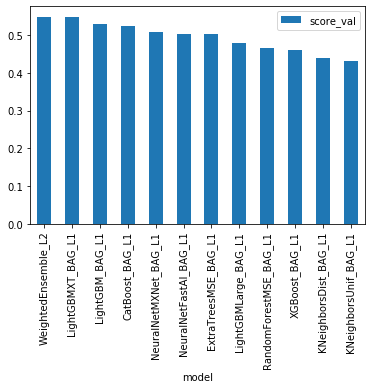

In [45]:
predictor2.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [46]:
predictor2.evaluate(dfd_test)

Evaluation: r2 on test data: 0.3296197110735112
Evaluations on test data:
{
    "r2": 0.3296197110735112,
    "root_mean_squared_error": -58.63157173036981,
    "mean_squared_error": -3437.6612035734997,
    "mean_absolute_error": -44.644462671172754,
    "pearsonr": 0.5866496596979706,
    "median_absolute_error": -36.31768798828125
}


{'r2': 0.3296197110735112,
 'root_mean_squared_error': -58.63157173036981,
 'mean_squared_error': -3437.6612035734997,
 'mean_absolute_error': -44.644462671172754,
 'pearsonr': 0.5866496596979706,
 'median_absolute_error': -36.31768798828125}